# Importing necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Preprocessing Data

In [2]:
# Simulated dataset of grayscale images (e.g., 28x28 pixels)
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Creating the Autoencoder

In [3]:
# Define the Autoencoder architecture
input_img = keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation="relu")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

Creating and training the autoencoder(decoder)

In [4]:
# Create the Autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [5]:
# Train the Autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 11s 10ms/step - loss: 0.2279 - val_loss: 0.1500
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1384 - val_loss: 0.1288
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1249 - val_loss: 0.1200
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1182 - val_loss: 0.1146
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1142 - val_loss: 0.1114
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1117 - val_loss: 0.1092
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1097 - val_loss: 0.1077
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1080 - val_loss: 0.1062
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1065 - val_loss: 0.1046
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1054 - val_loss: 0.10

Evaluating the model

In [6]:
# Evaluate the Autoencoder (loss should be low, indicating good reconstruction)
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test loss: {loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1036
Test loss: 0.10363595932722092


Creating the encoder

In [7]:
# Create the encoder model
encoder = keras.Model(inputs=input_img, outputs=encoded)

# Compessing and reconstructing images

In [8]:
# Use the trained autoencoder for compression and reconstruction
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Visualizing the results

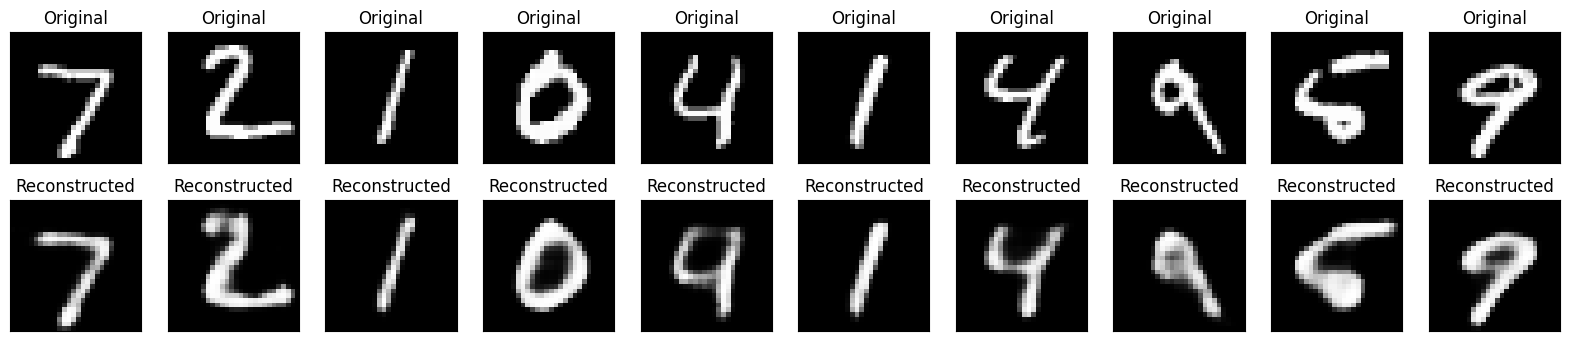

In [9]:
# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
